In [118]:
%matplotlib inline

import numpy as np
import pandas as pd
import gzip
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools
import seaborn as sns
import swifter
import functools
from scipy.special import comb

BOTS = [
    'RandomBot', 'ObserveBot', 'CFRBot_3000000', 'CFRBot_6000000', 'ISMCTSBot', 'MOISMCTSBot', 'Deeprole',
    'Deeprole_3_1', 'Deeprole_10_5', 'Deeprole_30_15', 'Deeprole_100_50',
    'Deeprole_100_0', 'Deeprole_100_25', 'Deeprole_100_75'
]
# BOTS = ['Deeprole_3_1', 'Deeprole_10_5', 'Deeprole_30_15', 'Deeprole_100_50']
NUM_PLAYERS = 5

In [114]:
def load_dataframes():
    result = []
    for filename in glob.glob('tournaments/*.msg.gz'):
        with gzip.open(filename, 'r') as f:
            result.append(pd.read_msgpack(f))
    df = pd.concat(result)
    df.win_type = df.win_type.astype('category')
    df.winner = df.winner.astype('category')
    for i in range(5):
        df['bot_{}'.format(i)] = df['bot_{}'.format(i)].astype('category')
        df['bot_{}_role'.format(i)] = df['bot_{}_role'.format(i)].astype('category')
    df.reset_index(drop=True, inplace=True)
    return df

ALL_GAMES = load_dataframes()

In [119]:
def group_by_bot(games):
    bots = BOTS
    new_dataframe = {}
    for bot in bots:
        print bot
        for i in range(5):
            selector = games['bot_{}'.format(i)] == bot
            if i == 0:
                bot_count = selector.astype(int)
                payoff = games['bot_{}_payoff'.format(i)][selector]
            else:
                bot_count += selector.astype(int)
                payoff = payoff.add(games['bot_{}_payoff'.format(i)][selector], fill_value=0.0)
        new_dataframe['{}_count'.format(bot)] = bot_count
        new_dataframe['{}_payoff'.format(bot)] = payoff.divide(bot_count)

    return pd.DataFrame(new_dataframe)

GROUPED_GAMES = group_by_bot(ALL_GAMES)

RandomBot
ObserveBot
CFRBot_3000000
CFRBot_6000000
ISMCTSBot
MOISMCTSBot
Deeprole
Deeprole_3_1
Deeprole_10_5
Deeprole_30_15
Deeprole_100_50
Deeprole_100_0
Deeprole_100_25
Deeprole_100_75


In [51]:
GROUPED_GAMES

Deeprole_100_50_count  Deeprole_100_50_payoff  Deeprole_10_5_count  \
0                            0                     NaN                    0   
1                            0                     NaN                    0   
2                            0                     NaN                    0   
3                            0                     NaN                    0   
4                            0                     NaN                    0   
5                            0                     NaN                    0   
6                            0                     NaN                    0   
7                            0                     NaN                    0   
8                            0                     NaN                    0   
9                            0                     NaN                    0   
10                           0                     NaN                    0   
11                           0                     NaN                    0   
12                           0                     NaN                    0   
13                           0                     NaN                    0   
14                           0                     NaN                    0   
15                           0                     NaN                    0   
16                           0                     NaN                    0   
17                           0                     NaN                    0   
18                           0                     NaN                    0   
19                           0                     NaN                    0   
20                           0                     NaN                    0   
21                           0                     NaN                    0   
22                           0                     NaN                    0   
23                           0                     NaN                    0   
24                           0                     NaN                    0   
25                           0                     NaN                    0   
26                           0                     NaN                    0   
27                           0                     NaN                    0   
28                           0                     NaN                    0   
29                           0                     NaN                    0   
...                        ...                     ...                  ...   
1413090                      2                    1.00                    0   
1413091                      2                   -1.00                    0   
1413092                      2                   -1.00                    0   
1413093                      2                    0.25                    0   
1413094                      2                   -0.25                    0   
1413095                      2                    0.25                    0   
1413096                      2                    0.25                    0   
1413097                      2                   -0.25                    0   
1413098                      2                    0.25                    0   
1413099                      2                   -1.00                    0   
1413100                      2                   -1.00                    0   
1413101                      2                   -1.00                    0   
1413102                      2                    0.25                    0   
1413103                      2                    0.25                    0   
1413104                      2                    0.25                    0   
1413105                      2                    0.25                    0   
1413106                      2                    0.25                    0   
1413107                      2                    0.25                    0   
1413108                      2                    1.50     

In [117]:
PAYOFF_TABLE = GROUPED_GAMES.groupby(['{}_count'.format(bot) for bot in BOTS]).mean()
PAYOFF_TABLE = PAYOFF_TABLE[['{}_payoff'.format(bot) for bot in BOTS]].fillna(0.0)
import functools

def get_payoff_table(big_table, bots):
    index_reset = big_table.reset_index()
    filtered = index_reset[['{}_count'.format(bot) for bot in bots] + ['{}_payoff'.format(bot) for bot in bots]]
    criteria = [filtered['{}_count'.format(bot)] != 0 for bot in bots]
    new_criter = functools.reduce(lambda a,b: a | b, criteria)
    bot_sum = functools.reduce(lambda a,b: a + b, [filtered['{}_count'.format(bot)] for bot in bots])
    
    return filtered[new_criter & (bot_sum == NUM_PLAYERS)].groupby(['{}_count'.format(bot) for bot in bots]).mean()
    

table = get_payoff_table(PAYOFF_TABLE, BOTS)
table
# DEEPROLE_PAYOFFS = {
#     bot: get_payoff_table(PAYOFF_TABLE, ['Deeprole', bot])
#     for bot in BOTS if bot != 'Deeprole'
# }

# DEEPROLE_PAYOFFS['CFRBot_3000000']

RandomBot_payoff  \
RandomBot_count ObserveBot_count CFRBot_3000000_count CFRBot_6000000_count ISMCTSBot_count MOISMCTSBot_count Deeprole_count                     
0               0                0                    0                    0               0                 5                       0.000000   
                                                                                           1                 4                       0.000000   
                                                                                           2                 3                       0.000000   
                                                                                           3                 2                       0.000000   
                                                                                           4                 1                       0.000000   
                                                                                           5                 0                       0.000000   
                                                                           1               0                 4                       0.000000   
                                                                           2               0                 3                       0.000000   
                                                                           3               0                 2                       0.000000   
                                                                           4               0                 1                       0.000000   
                                                                           5               0                 0                       0.000000   
                                                      1                    0               0                 4                       0.000000   
                                                      2                    0               0                 3                       0.000000   
                                                      3                    0               0                 2                       0.000000   
                                                      4                    0               0                 1                       0.000000   
                                                      5                    0               0                 0                       0.000000   
                                 1                    0                    0               0                 4                       0.000000   
                                 2                    0                    0               0                 3                       0.000000   
                                 3                    0                    0               0                 2                       0.000000   
                                 4                    0                    0               0                 1                       0.000000   
                                 5                    0                    0               0                 0                       0.000000   
                1                0                    0                    0               0                 4                       0.000000   
                                                      1                    0               0                 3                       0.000000   
                                                      2                    0               0                 2                       0.000000   
                                                      3                    0               0                 1                       0.000000   
                                                      4                    0               0                 0                       0.000000   
                2                0                    0          

In [8]:
def scipy_multinomial(params):
    if len(params) == 1:
        return 1
    coeff = (comb(np.sum(params), params[-1], exact=True) *
             scipy_multinomial(params[:-1]))
    return coeff

In [9]:
def P(N_i, x):
    x = np.array(x)
    N_i = np.array(N_i)
    return scipy_multinomial(N_i) * np.prod( x ** N_i )

In [14]:
def r(x, table):
    x = np.array(x)
    numerator = np.zeros(len(x))
    for index, payoff in table.iterrows():
        numerator += P(index, x) * np.array(payoff)
    denominator = 1.0 - (1.0 - x) ** NUM_PLAYERS
    return np.nan_to_num(numerator / denominator)

In [19]:
def calc_xdot(x, table):
    rx = r(x, table)
    xtAx = np.sum(x * rx)
    xdot = x * (rx - xtAx)
    return xdot

In [20]:
LEARNING_RATE = 0.1

def find_nash(table, num_bots):
    x = np.array([0.0, 0.8, 0.1, 0.1]) #np.ones(num_bots) / num_bots
    for i in range(1000000):
        x += LEARNING_RATE*calc_xdot(x, table)
        if i % 300 == 0:
            print x

# RandomBot
# ObserveBot
# CFRBot_3000000
# CFRBot_6000000
# ISMCTSBot
# MOISMCTSBot
# Deeprole
            
find_nash(table, 4)

/Users/jserrino/.virtualenvs/battlefield/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


[0.         0.80162862 0.09921583 0.09915554]
[0.         0.99290079 0.0042943  0.00280491]
[0.00000000e+00 9.99811073e-01 1.37293124e-04 5.16337722e-05]
[0.00000000e+00 9.99994706e-01 4.35495445e-06 9.38599996e-07]
[0.00000000e+00 9.99999845e-01 1.38110258e-07 1.70559075e-08]
[0.00000000e+00 9.99999995e-01 4.37991425e-09 3.09930753e-10]
[0.00000000e+00 1.00000000e+00 1.38900938e-10 5.63189414e-12]
[0.00000000e+00 1.00000000e+00 4.40499263e-12 1.02335463e-13]


KeyboardInterrupt: 

In [28]:
def two_to_three(vec):
    return np.matmul([[0, 2.0/(3 ** 0.5)], [1, -1/(3 ** 0.5)], [-1, -1/(3 ** 0.5)]], vec) + np.array([0, 0.5, 0.5])

def three_to_two(vec):
    return np.matmul(np.array([[0.5, 1, 0], [1.5 * (3 ** 0.5), (3 ** 0.5), (3 ** 0.5)]]), vec - np.array([0, 0.5, 0.5]))

In [41]:
def calc_arrow(x, y, table):
    if y < 0:
        return 0.0, 0.0
    if y > (3 ** 0.5) * (x + 0.5):
        return 0.0, 0.0
    if y > - (3 ** 0.5) * (x - 0.5):
        return 0.0, 0.0
    
    probs = two_to_three(np.array([x, y]))
    
    new_probs = probs + 0.01 * calc_xdot(probs, table)
    new_xy = three_to_two(new_probs)
    return new_xy[0] - x, new_xy[1] - y

In [111]:
def make_triangle_plot(big_table, bots):
    table = get_payoff_table(big_table, bots)
    X = np.arange(-0.51, 0.51, 0.02)
    Y = np.arange(0, (3 ** 0.5) / 2, 0.02)
    U, V = np.meshgrid(X, Y)
    
    for i in range(len(U)):
        for j in range(len(U[0])):
            U[i][j], V[i][j] = calc_arrow(U[i][j], V[i][j], table)
    
    color = np.sqrt(U * U + V * V)
    
    plt.figure(figsize=(16,13))
    plt.quiver(X, Y, U/color, V/color, color, scale=60)
    plt.text(-0.5, -0.02, bots[2], horizontalalignment='center')
    plt.text(0.5, -0.02, bots[1], horizontalalignment='center')
    plt.text(0, 0.885, bots[0], horizontalalignment='center')

/Users/jserrino/.virtualenvs/battlefield/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
/Users/jserrino/.virtualenvs/battlefield/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


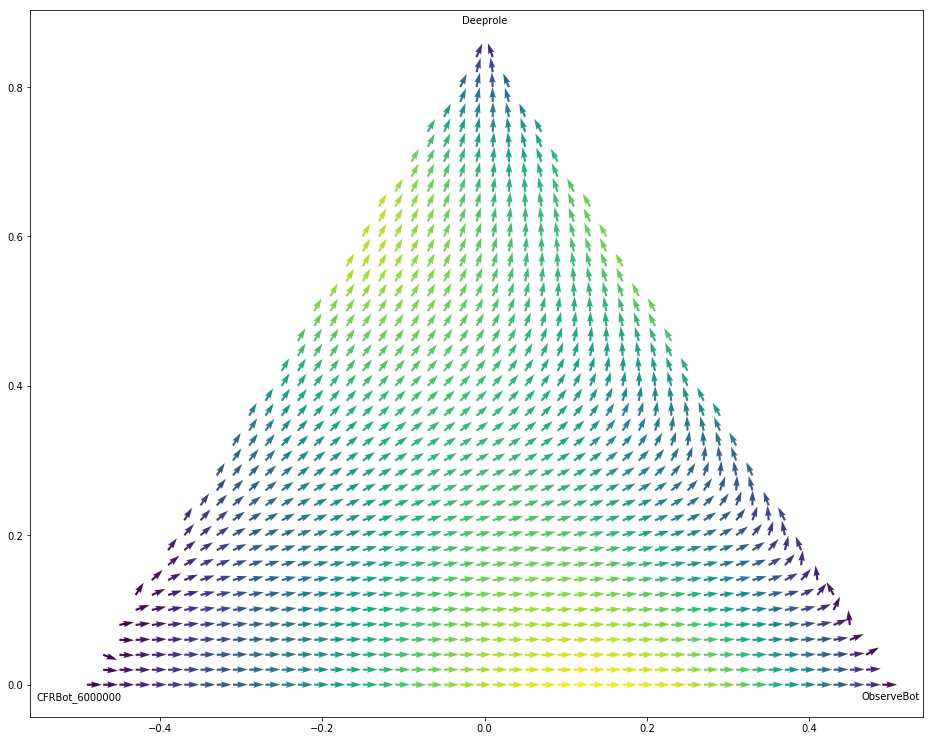

In [123]:
make_triangle_plot(PAYOFF_TABLE, ['Deeprole', 'ObserveBot', 'CFRBot_6000000'])